In [2]:
# principal component analysis
# rows are observations, CLC for whole season
# predicting CLC
# Each column of matrix is airport
# Row is hourly observation 4

In [130]:
# external imports
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# my imports
from Airport_CLC_Calculation import *
from Timeseries_Graphing import *
from Bar_Plotting import *
from Box_Plotting import *

In [131]:
# read sst file
# Library to work with netCDF files
import netCDF4 as nc

# Open a .nc file ("file_name")
file_id = nc.Dataset("/Users/ginoangelici/Downloads/sst.nobs.nc", 'r')

In [132]:
sst = file_id.variables['sst'][:]
sst


masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        ...,

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --,

In [133]:
# Read in GOES ABI fixed grid projection x-coordinate data
# Metadata indicates data are 1-dimensional so use [:] to extract all data in 1 dimension
x_coordinate = file_id.variables['sst'][:]

# Metadata indicates data are stored as integers ("int16") in the .nc file
# netCDF4 library automatically applies "scale_factor" and "add_offset" to covnvert stored integers to floats
# Check data type of first value in array to confirm
print('Array data values are type', type(x_coordinate[0]))

# Print x-coordinate array
# no sst? all missing
print(x_coordinate)

Array data values are type <class 'numpy.ma.core.MaskedArray'>
[[[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 ...

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
 

[[85.06451613 74.37634409 56.55913978 ... 57.967568   58.03141805
  30.14069074]
 [85.21557828 74.1187094  56.41444856 ... 56.20615579 58.03141805
  23.75689772]
 [84.63143689 66.62030821 46.98973935 ... 34.399546   58.03141805
  14.85946781]
 ...
 [82.61303089 56.08878233 39.25728872 ... 43.70619459 63.66817619
  21.88071438]
 [73.67082823 66.73557511 36.37188565 ... 30.01406104 49.69208075
  15.8034936 ]
 [77.44215187 62.33111954 43.57395751 ... 42.85238572 58.18439913
  36.29032258]]
Explained Variance Ratio:
   Principal Component  Explained Variance Ratio
0                    1                  0.357498
1                    2                  0.138502


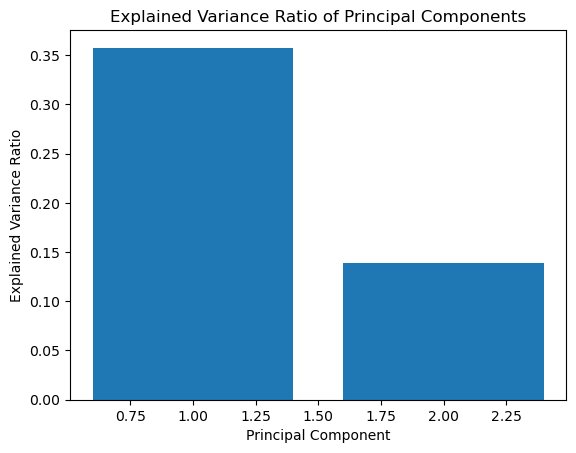

In [144]:
# get table with airports for columns and rows for observations?
# /Users/ginoangelici/Projects/Scripps/Coastal-Low-Cloudiness/CLC_Data/Avg_Tables/Airport_CLC_Summary_Table_Years_1950_to_2023_Months_May_June_July_August_September_Hours_7_10_13_16_Elevation_Definition_1000.csv
# made during table creation ^
# ALL airports

df_1 = pd.read_csv("CLC_Data/Avg_Tables/Airport_CLC_Summary_Table_Years_1950_to_2023_Months_May_June_July_August_September_Hours_7_10_13_16_Elevation_Definition_1000.csv")
df_1.drop(columns=df_1.columns[0], axis=1,  inplace=True)
df_1 = df_1.fillna(df_1.mean())

features = ["PADK", "PACD", "PADQ", "PAHO", "PYAK", "KSIT", \
"PANT", "CYAZ", "KAST", "KOTH", "KACV", "KOAK", "KSFO", "KMRY", "KVBG", "KNTD", "KLAX", "KLGB", "KSAN", "KNZY", "KNSI", "KNUC", "KAVX"]

x = df_1[features].values
print(x)
x = StandardScaler().fit_transform(x)

n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(x)

explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_df = pd.DataFrame({'Principal Component': range(1, n_components + 1),
                                      'Explained Variance Ratio': explained_variance_ratio})

print("Explained Variance Ratio:")
print(explained_variance_df)

plt.figure()
plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

In [135]:
from statsmodels. graphics. tsaplots import plot_acf, plot_pacf
from statsmodels. tsa import api as smt 
from statsmodels. tsa.seasonal import seasonal_decompose 
from statsmodels. tsa. stattools import adfuller
from dateutil.parser import parse 
from eofs.xarray import Eof 
from eofs.examples import example_data_path 

In [136]:
principal_components
PC1 = [x[0] for x in principal_components]
PC1

[4.365741622445853,
 5.146353820791933,
 -0.28492551700056834,
 -1.6235788795011294,
 1.0936032606272106,
 1.6660201109630186,
 0.34137014830576407,
 -1.6211402207354642,
 0.5657800613906396,
 -1.5227746773673116,
 -0.8872887419017941,
 2.2613471011129933,
 4.546337191189364,
 1.5159698432823687,
 2.2785240449538855,
 4.132877920885701,
 0.04702071999841342,
 3.7529252354891223,
 0.6635943066232518,
 6.022189956814178,
 0.4365162366826652,
 1.7791660875513615,
 0.14271075613916975,
 6.0689258094734795,
 4.3729041747142166,
 6.189689222969659,
 1.2916071268293399,
 -0.12952200243840511,
 -4.000712712943931,
 -1.1688223676287668,
 1.7555230480083852,
 -0.42513949142436347,
 3.565817441819247,
 -0.6842810555304971,
 -5.241969209672888,
 -1.0251589926587015,
 1.2920077289319187,
 4.064886637940167,
 -1.687806762823883,
 -0.02428622991750129,
 -3.1635762202629096,
 6.792849348502922,
 -1.4498233259805453,
 -1.1713788602630926,
 -1.9538098132710708,
 -0.9193450209131127,
 -3.2440214321072167

<function matplotlib.pyplot.close(fig=None)>

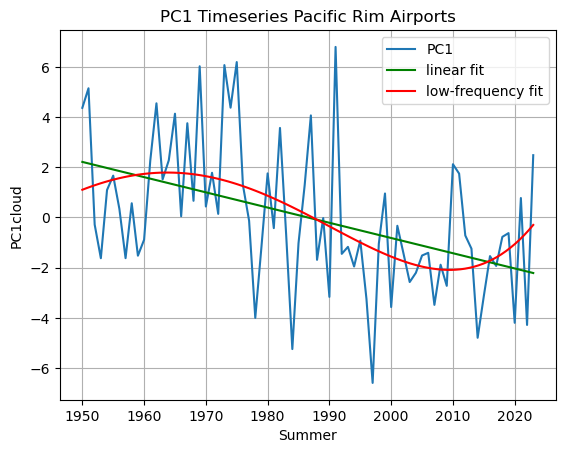

In [148]:


fig, ax = plt.subplots()
x = np.arange(1950,2024)
y = PC1
plt.plot(x, y)
plt.title("PC1 Timeseries Pacific Rim Airports")
plt.xlabel("Summer")
plt.ylabel("PC1cloud")
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*np.array(x)+b, color="green")

degree = 4
coefficients = np.polyfit(x, y, degree)
poly = np.poly1d(coefficients)
x_fit = np.linspace(min(x), max(x), 100)
y_fit = poly(x_fit)
plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')

# a, b, c, d = np.poly1d(np.polyfit(x, y, 3))
# print(a, b, c, d)
# plt.plot(x, (a*np.array(x)**3)+(b*np.array(x)**2)+(c*np.array(x))+d, color="red")

ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='major')
plt.legend(["PC1", "linear fit", "low-frequency fit"])
plt.savefig("PCA/California PCA.pdf")
plt.close

In [138]:
# all: ["PADK", "PACD", "PADQ", "PAHO", "PYAK", "KSIT", "PANT", "CYAZ", "KAST", "KOTH", "KACV", "KOAK", "KSFO", "KMRY", "KVBG", "KNTD", "KLAX", "KLGB", "KSAN", "KNZY", "KNSI", "KNUC", "KAVX"]
# california: ["KACV", "KOAK", "KSFO", "KMRY", "KVBG", "KNTD", "KLAX", "KLGB", "KSAN", "KNZY", "KNSI", "KNUC", "KAVX"]

[[51.52596833 26.16129032 20.33333333 41.31744562 46.94836269 50.58085421
  38.49710852 36.81312636 42.87883556 45.45387897 57.967568   58.03141805
  30.14069074]
 [60.23337495 35.0799017  30.7090303  56.03326043 46.94836269 41.87701191
  31.5353563  31.86231092 34.04938381 36.56729447 56.20615579 58.03141805
  23.75689772]
 [54.00692602 26.16075583 20.99937754 37.98620853 46.94836269 37.63972644
  27.93002658 25.45165652 26.65989858 31.54107863 34.399546   58.03141805
  14.85946781]
 [45.17010231 21.89984571 24.45828537 38.78749445 46.94836269 31.33538778
  27.47717278 23.57927271 28.12677045 31.02722577 32.4536911  58.03141805
  23.17741283]
 [45.36200297 23.00477015 20.79718578 34.16673704 46.94836269 43.93632609
  35.01591054 34.19085523 39.28903526 42.08473223 38.0077417  58.03141805
  23.17741283]
 [49.65819435 24.21297967 19.43420274 42.81900629 46.94836269 41.03850498
  32.42039814 31.46685289 33.12746269 37.78846297 38.80571849 58.03141805
  23.17741283]
 [47.76365606 23.68390

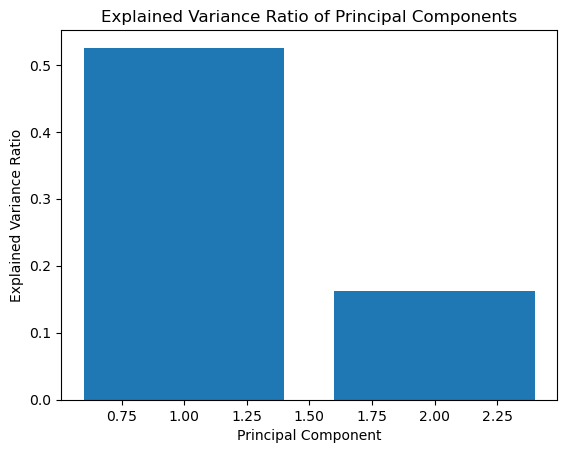

<function matplotlib.pyplot.close(fig=None)>

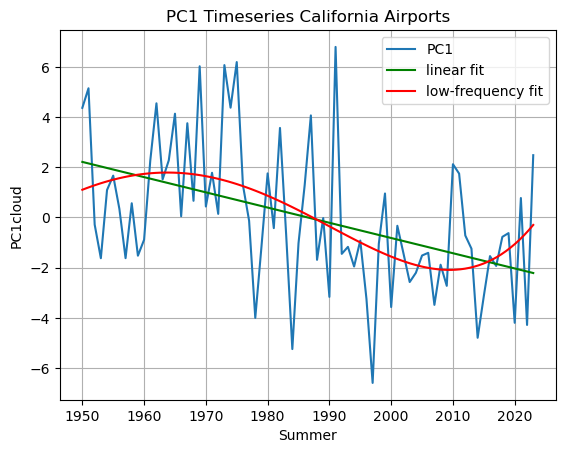

In [149]:
# get table with airports for columns and rows for observations?
# /Users/ginoangelici/Projects/Scripps/Coastal-Low-Cloudiness/CLC_Data/Avg_Tables/Airport_CLC_Summary_Table_Years_1950_to_2023_Months_May_June_July_August_September_Hours_7_10_13_16_Elevation_Definition_1000.csv
# made during table creation ^
# ALL airports
plt.close

df_1 = pd.read_csv("CLC_Data/Avg_Tables/Airport_CLC_Summary_Table_Years_1950_to_2023_Months_May_June_July_August_September_Hours_7_10_13_16_Elevation_Definition_1000.csv")
df_1.drop(columns=df_1.columns[0], axis=1,  inplace=True)
df_1 = df_1.fillna(df_1.mean())

features = ["KACV", "KOAK", "KSFO", "KMRY", "KVBG", "KNTD", "KLAX", "KLGB", "KSAN", "KNZY", "KNSI", "KNUC", "KAVX"]

x = df_1[features].values
print(x)
x = StandardScaler().fit_transform(x)

n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(x)

explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_df = pd.DataFrame({'Principal Component': range(1, n_components + 1),
                                      'Explained Variance Ratio': explained_variance_ratio})

print("Explained Variance Ratio:")
print(explained_variance_df)

plt.figure()
plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()
plt.close()

fig, ax = plt.subplots()
x = np.arange(1950,2024)
PC1 = [x[0] for x in principal_components]
PC1
y = PC1
plt.plot(x, y)
plt.title("PC1 Timeseries California Airports")
plt.xlabel("Summer")
plt.ylabel("PC1cloud")
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*np.array(x)+b, color="green")

degree = 4
coefficients = np.polyfit(x, y, degree)
poly = np.poly1d(coefficients)
x_fit = np.linspace(min(x), max(x), 100)
y_fit = poly(x_fit)
plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')

# a, b, c, d = np.poly1d(np.polyfit(x, y, 3))
# print(a, b, c, d)
# plt.plot(x, (a*np.array(x)**3)+(b*np.array(x)**2)+(c*np.array(x))+d, color="red")

ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='major')
plt.legend(["PC1", "linear fit", "low-frequency fit"])
plt.savefig("PCA/California PCA.pdf")
plt.close
